# Emotion Classification Using Augmented Dataset: Classical Machine Learning Models

In this Colab notebook, we leverage the augmented dataset generated using the synonym-based data augmentation approach to train and evaluate classical machine learning models for emotion classification. This notebook showcases the practical application of machine learning pipelines on a balanced dataset, ensuring fair performance across all emotion classes.

### Key Highlights:
1. **Augmented Dataset:**
   - The dataset is preprocessed and balanced using a synonym-based augmentation technique.
   - This ensures equitable representation for all emotion classes.

2. **Machine Learning Pipeline:**
   - Feature extraction using **TF-IDF Vectorization**.
   - Model training and evaluation using four classical machine learning models:
     - Logistic Regression
     - Naive Bayes
     - Decision Tree
     - Random Forest

3. **Evaluation Metrics:**
   - Performance metrics include:
     - Accuracy
     - Classification Reports
     - Confusion Matrices

4. **Comparison of Models:**
   - Visualize and compare model accuracies using bar plots.
   - Analyze confusion matrices for insights into model performance.

This notebook provides a systematic approach to evaluating classical machine learning models on a balanced text dataset for emotion classification.


# Step 1: Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Step 2: Load the combined dataset

In [ ]:
# Load the augmented dataset
df = pd.read_csv('Augmented_Emotion_Dataset.csv')

# Split the dataset into features and labels
X = df['cleaned_text']
y = df['EMOTION']

# Step 3: Split the Data into Train and Test Sets

In [ ]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Text Vectorization using TF-IDF

In [ ]:
# Vectorize the text data using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)  # Adjust max_features as needed
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Step 5: Train and Evaluate Models using the augmented balanced dataset


--- Logistic Regression Performance ---
Accuracy: 0.5892
Classification Report:
               precision    recall  f1-score   support

       anger       0.63      0.46      0.53      4273
     boredom       0.87      0.90      0.89      3259
   confusion       0.56      0.59      0.57      4222
     disgust       0.58      0.65      0.61      4525
        fear       0.51      0.43      0.47      4332
       guilt       0.50      0.47      0.49      4553
         joy       0.52      0.64      0.57      5621
     neutral       0.66      0.64      0.65      4043
     sadness       0.49      0.46      0.47      4807
       shame       0.53      0.51      0.52      4291
    surprise       0.76      0.85      0.81      3376

    accuracy                           0.59     47302
   macro avg       0.60      0.60      0.60     47302
weighted avg       0.59      0.59      0.59     47302



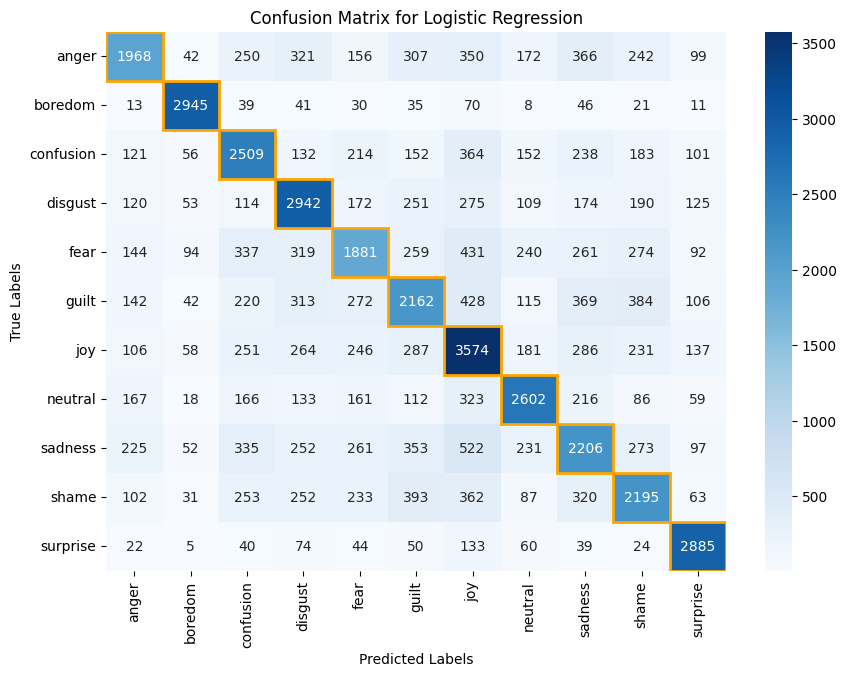


--- Naive Bayes Performance ---
Accuracy: 0.5451
Classification Report:
               precision    recall  f1-score   support

       anger       0.58      0.38      0.46      4273
     boredom       0.81      0.84      0.83      3259
   confusion       0.49      0.56      0.52      4222
     disgust       0.53      0.61      0.57      4525
        fear       0.48      0.36      0.41      4332
       guilt       0.46      0.42      0.44      4553
         joy       0.47      0.68      0.56      5621
     neutral       0.61      0.61      0.61      4043
     sadness       0.46      0.43      0.45      4807
       shame       0.52      0.44      0.48      4291
    surprise       0.73      0.76      0.75      3376

    accuracy                           0.55     47302
   macro avg       0.56      0.55      0.55     47302
weighted avg       0.55      0.55      0.54     47302



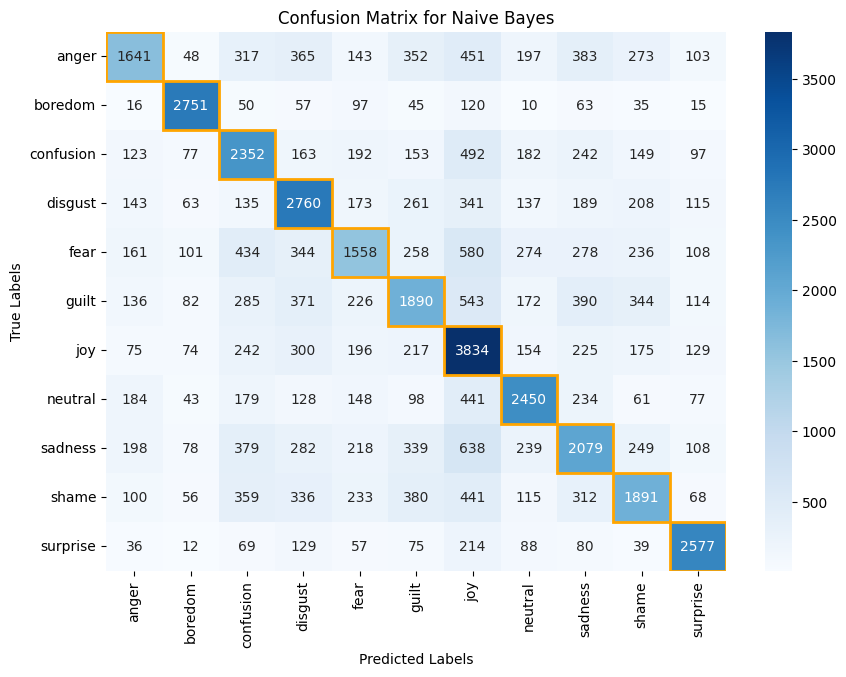


--- Decision Tree Performance ---
Accuracy: 0.7065
Classification Report:
               precision    recall  f1-score   support

       anger       0.70      0.63      0.66      4273
     boredom       0.92      0.94      0.93      3259
   confusion       0.80      0.79      0.79      4222
     disgust       0.77      0.79      0.78      4525
        fear       0.67      0.64      0.65      4332
       guilt       0.73      0.72      0.73      4553
         joy       0.44      0.49      0.47      5621
     neutral       0.72      0.70      0.71      4043
     sadness       0.64      0.62      0.63      4807
       shame       0.75      0.73      0.74      4291
    surprise       0.83      0.88      0.85      3376

    accuracy                           0.71     47302
   macro avg       0.72      0.72      0.72     47302
weighted avg       0.71      0.71      0.71     47302



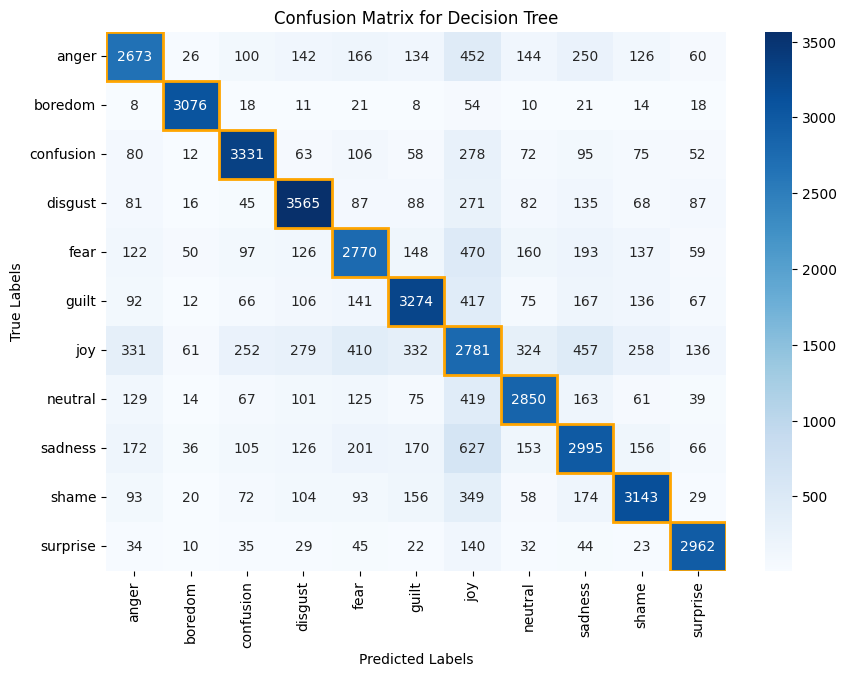


--- Random Forest Performance ---
Accuracy: 0.8219
Classification Report:
               precision    recall  f1-score   support

       anger       0.88      0.72      0.79      4273
     boredom       0.95      0.97      0.96      3259
   confusion       0.89      0.89      0.89      4222
     disgust       0.86      0.91      0.89      4525
        fear       0.84      0.79      0.81      4332
       guilt       0.87      0.85      0.86      4553
         joy       0.59      0.65      0.62      5621
     neutral       0.81      0.81      0.81      4043
     sadness       0.78      0.76      0.77      4807
       shame       0.87      0.86      0.87      4291
    surprise       0.85      0.97      0.90      3376

    accuracy                           0.82     47302
   macro avg       0.83      0.83      0.83     47302
weighted avg       0.82      0.82      0.82     47302



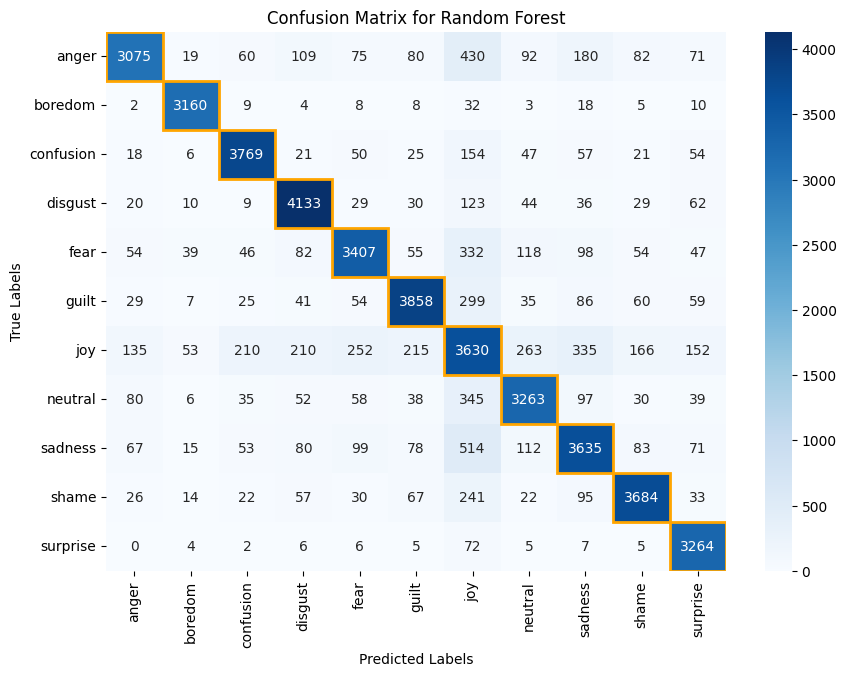

In [ ]:
# Initialize models to train
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": MultinomialNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

# Dictionary to store accuracy results
accuracy_results = {}

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name, labels):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')

    # Highlight the diagonal with a different color
    for i in range(len(cm)):
        plt.gca().add_patch(plt.Rectangle((i, i), 1, 1, fill=False, edgecolor='orange', lw=2))

    plt.show()

# Train, evaluate and plot results for each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train_tfidf, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test_tfidf)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results[model_name] = accuracy

    # Print classification report
    print(f"\n--- {model_name} Performance ---")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Plot confusion matrix
    plot_confusion_matrix(y_test, y_pred, model_name, labels=np.unique(y))

# Step 6: Plot Accuracy Results for Each Model

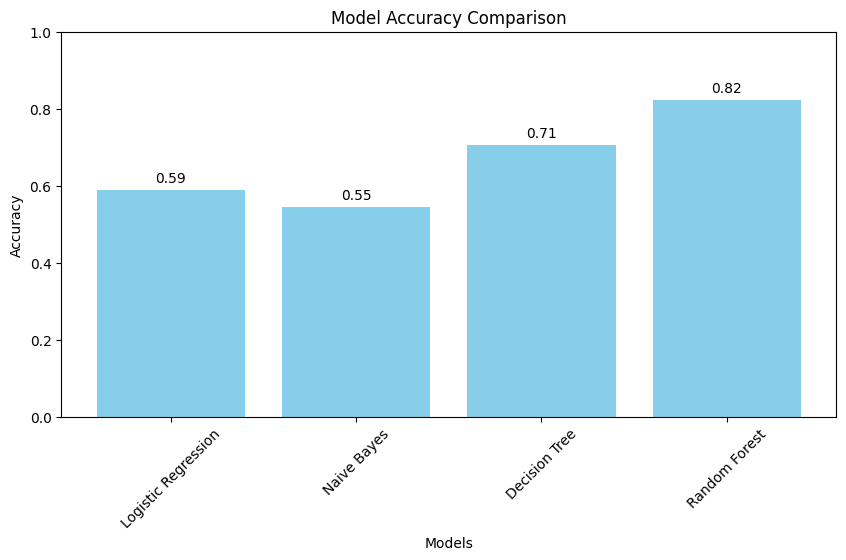

In [ ]:
# Plot model accuracy comparison
plt.figure(figsize=(10, 5))
bars = plt.bar(accuracy_results.keys(), accuracy_results.values(), color='skyblue')
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1
plt.xticks(rotation=45)

# Add value labels on each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, f"{yval:.2f}", ha='center')

plt.show()